<h1 style="font-size:64px; color:red;">Ticket  Flight Price Prediction</h1>

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Data_Train.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df.duplicated().mean()

0.02059346625479734

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10463,10463,10463,10463,10462,10463,10463,10463,10462,10463,10463.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3700,490,4346,4346,2376,233,412,544,5625,8183,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9026.642454
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4624.653227
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5224.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8266.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12343.500000


In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Feature Engineering

In [7]:
df['Additional_Info'].value_counts()

No info                         8183
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [8]:
df['Additional_Info'] = df['Additional_Info'].replace('No Info','No info')

In [9]:
df['Additional_Info'].value_counts()

No info                         8186
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [10]:
df['Day_of_Journey'] = df['Date_of_Journey'].str.split('/').str[0].astype(int)
print(df['Day_of_Journey'])

0        24
1         1
2         9
3        12
4         1
         ..
10678     9
10679    27
10680    27
10681     1
10682     9
Name: Day_of_Journey, Length: 10463, dtype: int32


In [11]:
df['Number_of_Dep_Time'] = df['Dep_Time'].str.replace(':','.').astype(float)
df['Number_of_Dep_Time']

0        22.20
1         5.50
2         9.25
3        18.05
4        16.50
         ...  
10678    19.55
10679    20.45
10680     8.20
10681    11.30
10682    10.55
Name: Number_of_Dep_Time, Length: 10463, dtype: float64

In [12]:
df['Number_Duration'] = df['Duration'].str.replace('h','.').str.replace('m','').str.replace(' ','').astype(float)
df['Number_Duration']

0         2.50
1         7.25
2        19.00
3         5.25
4         4.45
         ...  
10678     2.30
10679     2.35
10680     3.00
10681     2.40
10682     8.20
Name: Number_Duration, Length: 10463, dtype: float64

In [13]:
# Check the condition and update 'Day_of_Journey' accordingly
condition = df['Number_of_Dep_Time'] + df['Number_Duration'] > 24
df.loc[condition, 'Day_of_Journey'] += 1

df['Day_Arrival'] = df['Day_of_Journey']

# Now, df['Day_of_Journey'] has been updated based on the condition
print(df['Day_of_Journey'])


0        25
1         1
2        10
3        12
4         1
         ..
10678     9
10679    27
10680    27
10681     1
10682     9
Name: Day_of_Journey, Length: 10463, dtype: int32


In [14]:
df = df.drop("Day_of_Journey", axis=1)

## Visualiztions

### Are there any corelation between the Price and other features

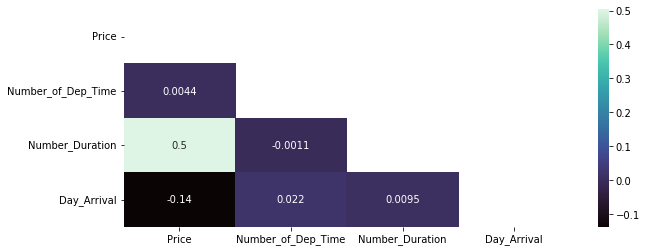

In [65]:
plt.figure(figsize=(10,4))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='mako',mask=np.triu(corr))
plt.show()

### Which month had the most number of enrolled flight tickits

In [66]:
df['Date_of_Journey'].str.split('/').str[1].astype(int).value_counts()

5    3396
6    3311
3    2678
4    1078
Name: Date_of_Journey, dtype: int64

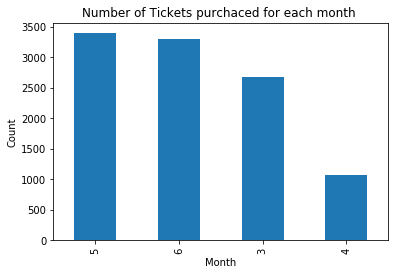

In [115]:
import matplotlib.pyplot as plt

counts = df['Date_of_Journey'].str.split('/').str[1].astype(int).value_counts()

counts.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of Tickets purchaced for each month ')
plt.show()


### What is the top favourite Destinations in India whrer most of the people at this time of the year visits

In [15]:
sub_10_index = df['Destination'].value_counts().head(10).index

In [117]:
sub_10_index

Index(['Cochin', 'Banglore', 'Delhi', 'New Delhi', 'Hyderabad', 'Kolkata'], dtype='object')

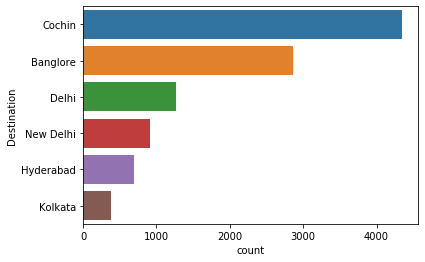

In [119]:
top_10 = df[df['Destination'].isin(sub_10_index)]
sns.countplot(data=top_10,y='Destination',order=sub_10_index)

## Dealing with Missing Values

In [16]:
df.isna().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price                 0
Number_of_Dep_Time    0
Number_Duration       0
Day_Arrival           0
dtype: int64

In [17]:
df[df['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Number_of_Dep_Time,Number_Duration,Day_Arrival
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480,9.45,23.4,7


In [18]:
df = df.drop(9039)

In [19]:
df.isna().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price                 0
Number_of_Dep_Time    0
Number_Duration       0
Day_Arrival           0
dtype: int64

## Dealing with Outliers

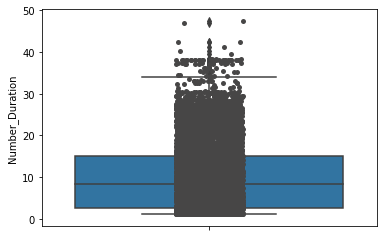

In [20]:
# Checking that we removed the outliers
sns.boxplot(data=df , y=df['Number_Duration'])
sns.stripplot(y=df['Number_Duration'], data=df, color="#474646")

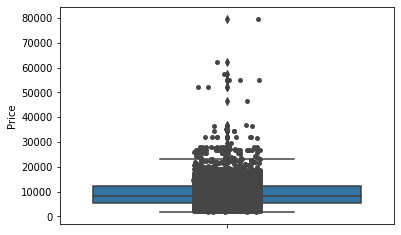

In [21]:
# Checking that we removed the outliers
sns.boxplot(data=df , y=df['Price'])
sns.stripplot(y=df['Price'], data=df, color="#474646")

In [22]:
from scipy import stats
 
z = np.abs(stats.zscore(df['Number_Duration']))
out = df.loc[z>3].index
len(out)

63

In [19]:
df['Price'].median()

8266.0

In [24]:
df['Number_Duration'].median()

8.25

In [25]:
from scipy import stats
 
z = np.abs(stats.zscore(df['Price']))
out = df.loc[z>3.5].index
len(out)

81

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Number_of_Dep_Time,Number_Duration,Day_Arrival
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,22.20,2.50,25
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5.50,7.25,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9.25,19.00,10
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,18.05,5.25,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,16.50,4.45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,19.55,2.30,9
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,20.45,2.35,27
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,8.20,3.00,27
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,11.30,2.40,1


In [21]:
df['Price'].iloc[out] = df['Price'].median()

In [16]:
# Creating a lsit of values for the traffic Status in a dictionry
stops_dict = {'non-stop' : 0,
                  '1 stop' : 1,
                  '2 stops' : 2,
                  '3 stops' : 3,
                  '4 stops' : 4}
# For Reversing the keys and vlues of the dictionary to retrive the encoded values using copmrehension for loop
rev_stops_dict = {value: key for key, value in stops_dict.items()}

In [17]:
df['Total_Stops'] = df['Total_Stops'].map(stops_dict)
df['Total_Stops']

0        0.0
1        2.0
2        2.0
3        1.0
4        1.0
        ... 
10678    0.0
10679    0.0
10680    0.0
10681    0.0
10682    2.0
Name: Total_Stops, Length: 10463, dtype: float64

## Encoding

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder , RobustScaler , StandardScaler
from category_encoders.binary import BinaryEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

In [25]:
Encoder = ColumnTransformer(transformers=[("BE",BinaryEncoder() , ["Airline","Source","Destination"]) ] , remainder="passthrough")

In [26]:
steps = []
steps.append(("Encoder" , Encoder))
steps.append(("Scaler" , RobustScaler()))
steps.append(("Model" , LinearRegression()) )
pipeline = Pipeline(steps = steps)

In [27]:
df.drop(["Date_of_Journey" , "Route" , "Dep_Time" , "Arrival_Time" , "Duration","Additional_Info"] , axis = 1 , inplace = True)

In [28]:
x = df.drop("Price" , axis = 1 )
y = df["Price"]

# Implementing Pipeline

In [29]:
result = cross_validate(pipeline ,x , y, cv = 5 , scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'] , return_train_score=True)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

## The test for applying a Pytorch NN

In [29]:
# def create_model():
#     model = Sequential()
#     model.add(Dense(units=64, activation='relu', input_shape=(15,)))  # Update input shape
#     model.add(Dense(units=1))
#     model.compile(optimizer='adam', loss='mean_squared_error')
#     return model

In [31]:
models = []
models.append(("LR" , LinearRegression()))
#models.append(("PR" , PolynomialFeatures(degree = 4)))
models.append(("SVR" , SVR(kernel = 'rbf')))
models.append(("DTR" , DecisionTreeRegressor(random_state = 0)))
models.append(("RFR" , RandomForestRegressor(n_estimators = 10, random_state = 0)))
#models.append(('NN' , KerasRegressor(build_fn=create_model, epochs=100, batch_size=32, verbose=0)))

## Visualizing Models Performance

In [32]:
for model in models:
    steps = []
    steps.append(("Encoder", Encoder))
    steps.append(("Scaler", RobustScaler()))
    steps.append(model)
    pipeline = Pipeline(steps=steps)
    result = cross_validate(pipeline, x, y, cv=5, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], return_train_score=True)
    
    for metric in ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']:
        train_key = f'train_{metric}'
        test_key = f'test_{metric}'
        
        print(f"{model[0]} AVG Train {metric} is {result[train_key].mean()}")
        print(f"{model[0]} AVG Test {metric} is {result[test_key].mean()}")
    print("*" * 30)


LR AVG Train neg_mean_squared_error is -10046241.009739129
LR AVG Test neg_mean_squared_error is -10082852.750051513
LR AVG Train neg_mean_absolute_error is -2154.064173017857
LR AVG Test neg_mean_absolute_error is -2156.227818680339
LR AVG Train r2 is 0.5303344188395019
LR AVG Test r2 is 0.5284312019871038
******************************
SVR AVG Train neg_mean_squared_error is -19457210.941726986
SVR AVG Test neg_mean_squared_error is -19469786.861169
SVR AVG Train neg_mean_absolute_error is -3259.2285694801967
SVR AVG Test neg_mean_absolute_error is -3261.4114788871093
SVR AVG Train r2 is 0.0902643449332794
SVR AVG Test r2 is 0.08942805168469511
******************************
DTR AVG Train neg_mean_squared_error is -1334143.7255232274
DTR AVG Test neg_mean_squared_error is -7884657.718905476
DTR AVG Train neg_mean_absolute_error is -585.7816980157424
DTR AVG Test neg_mean_absolute_error is -1738.469311945047
DTR AVG Train r2 is 0.9376144055686553
DTR AVG Test r2 is 0.6301067766351163


In [40]:
for model in models:
    steps = []
    steps.append(("Encoder", Encoder))
    steps.append(("Scaler", RobustScaler()))
    steps.append(model)
    pipeline = Pipeline(steps=steps)
    result = cross_validate(pipeline, x, y, cv=5, scoring=['r2'], return_train_score=True)
    
    for metric in ['r2']:
        train_key = f'train_{metric}'
        test_key = f'test_{metric}'
        
        print(f"{model[0]} AVG Train {metric} is {result[train_key].mean()}")
        print(f"{model[0]} AVG Test {metric} is {result[test_key].mean()}")
    print("*" * 30)


LR AVG Train r2 is 0.5303344188395018
LR AVG Test r2 is 0.528431201987104
******************************
SVR AVG Train r2 is 0.0840576478865116
SVR AVG Test r2 is 0.08324502786604435
******************************
DTR AVG Train r2 is 0.9376144055686553
DTR AVG Test r2 is 0.6350062717826501
******************************
RFR AVG Train r2 is 0.909861395974471
RFR AVG Test r2 is 0.7116154601504221
******************************


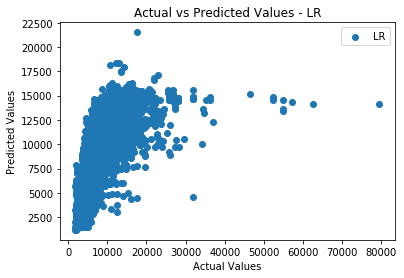

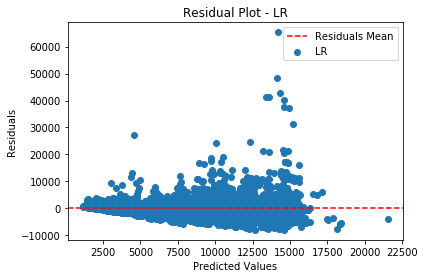

LR AVG Train neg_mean_squared_error is -10046241.009739129
LR AVG Test neg_mean_squared_error is -10082852.750051513
LR AVG Train neg_mean_absolute_error is -2154.0641730178563
LR AVG Test neg_mean_absolute_error is -2156.2278186803387
LR AVG Train r2 is 0.5303344188395018
LR AVG Test r2 is 0.528431201987104
******************************


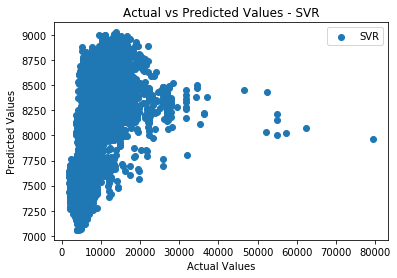

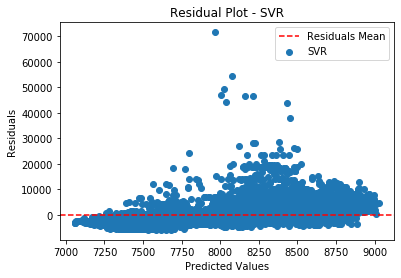

SVR AVG Train neg_mean_squared_error is -19589935.482953303
SVR AVG Test neg_mean_squared_error is -19601523.543114346
SVR AVG Train neg_mean_absolute_error is -3280.611124640177
SVR AVG Test neg_mean_absolute_error is -3282.5732715675017
SVR AVG Train r2 is 0.0840576478865116
SVR AVG Test r2 is 0.08324502786604435
******************************


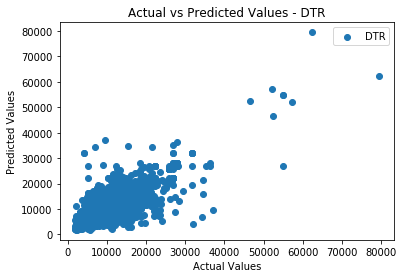

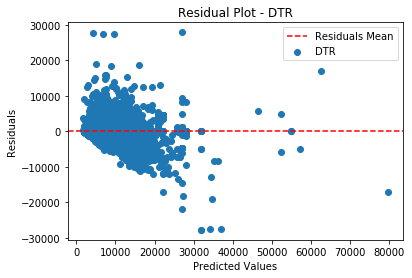

DTR AVG Train neg_mean_squared_error is -1334143.7255232274
DTR AVG Test neg_mean_squared_error is -7773697.450694884
DTR AVG Train neg_mean_absolute_error is -585.7816980157424
DTR AVG Test neg_mean_absolute_error is -1732.77934918868
DTR AVG Train r2 is 0.9376144055686553
DTR AVG Test r2 is 0.6350062717826501
******************************


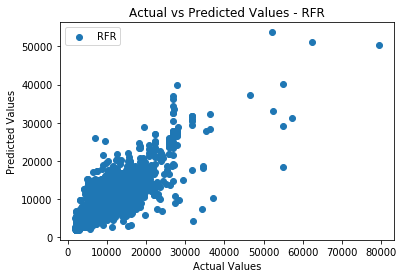

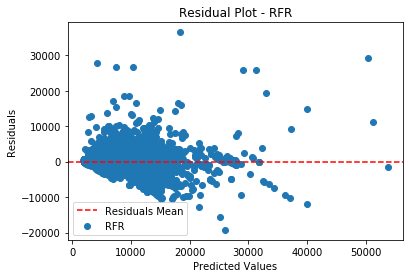

RFR AVG Train neg_mean_squared_error is -1927613.0245418805
RFR AVG Test neg_mean_squared_error is -6156819.0590686565
RFR AVG Train neg_mean_absolute_error is -856.9296432729112
RFR AVG Test neg_mean_absolute_error is -1585.8179250058124
RFR AVG Train r2 is 0.909861395974471
RFR AVG Test r2 is 0.7116154601504221
******************************


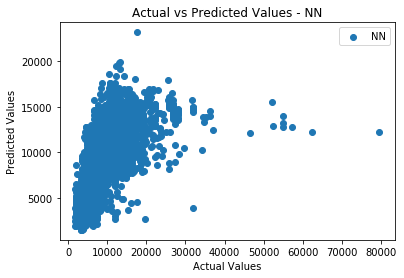

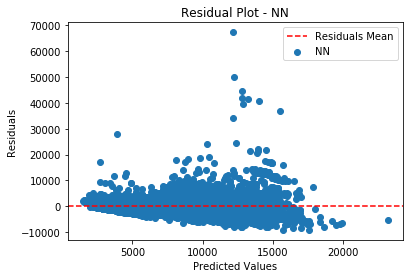

NN AVG Train neg_mean_squared_error is -10540186.447869381
NN AVG Test neg_mean_squared_error is -10588021.074405983
NN AVG Train neg_mean_absolute_error is -2193.261963941131
NN AVG Test neg_mean_absolute_error is -2196.572414870568
NN AVG Train r2 is 0.5072406460344903
NN AVG Test r2 is 0.5046505404548962
******************************


In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict

for model in models:
    steps = []
    steps.append(("Encoder", Encoder))
    steps.append(("Scaler", RobustScaler()))
    steps.append(model)
    pipeline = Pipeline(steps=steps)
    y_pred = cross_val_predict(pipeline, x, y, cv=5)
    
    # Scatter plot of actual vs predicted values
    plt.scatter(y, y_pred, label=model[0])
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted Values - {model[0]}')
    plt.legend()
    plt.show()
    
    # Residual plot
    residuals = y - y_pred
    plt.scatter(y_pred, residuals, label=model[0])
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='--', label='Residuals Mean')
    plt.title(f'Residual Plot - {model[0]}')
    plt.legend()
    plt.show()

    # Other metric printing remains unchanged
    result = cross_validate(pipeline, x, y, cv=5, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], return_train_score=True)
    
    for metric in ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']:
        train_key = f'train_{metric}'
        test_key = f'test_{metric}'
        
        print(f"{model[0]} AVG Train {metric} is {result[train_key].mean()}")
        print(f"{model[0]} AVG Test {metric} is {result[test_key].mean()}")
    
    print("*" * 30)


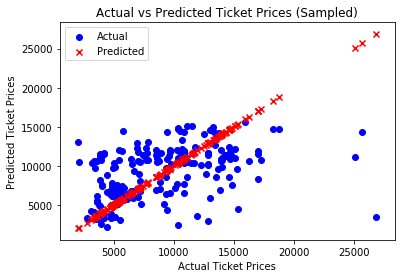

LR AVG Train neg_mean_squared_error is -10046241.009739129
LR AVG Test neg_mean_squared_error is -10082852.750051513
LR AVG Train neg_mean_absolute_error is -2154.0641730178563
LR AVG Test neg_mean_absolute_error is -2156.2278186803387
LR AVG Train r2 is 0.5303344188395018
LR AVG Test r2 is 0.528431201987104
******************************


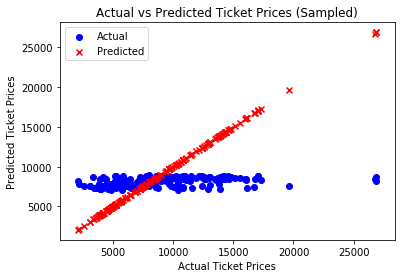

SVR AVG Train neg_mean_squared_error is -19589935.482953303
SVR AVG Test neg_mean_squared_error is -19601523.543114346
SVR AVG Train neg_mean_absolute_error is -3280.611124640177
SVR AVG Test neg_mean_absolute_error is -3282.5732715675017
SVR AVG Train r2 is 0.0840576478865116
SVR AVG Test r2 is 0.08324502786604435
******************************


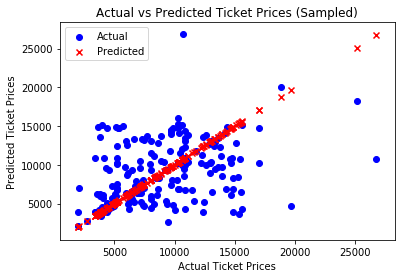

DTR AVG Train neg_mean_squared_error is -1334143.7255232274
DTR AVG Test neg_mean_squared_error is -7773697.450694884
DTR AVG Train neg_mean_absolute_error is -585.7816980157424
DTR AVG Test neg_mean_absolute_error is -1732.77934918868
DTR AVG Train r2 is 0.9376144055686553
DTR AVG Test r2 is 0.6350062717826501
******************************


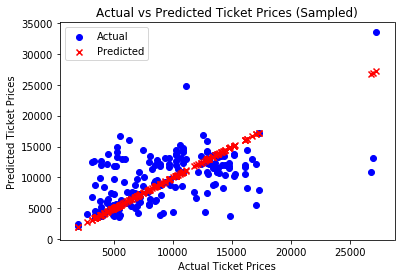

RFR AVG Train neg_mean_squared_error is -1927613.0245418805
RFR AVG Test neg_mean_squared_error is -6156819.0590686565
RFR AVG Train neg_mean_absolute_error is -856.9296432729112
RFR AVG Test neg_mean_absolute_error is -1585.8179250058124
RFR AVG Train r2 is 0.909861395974471
RFR AVG Test r2 is 0.7116154601504221
******************************


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict

for model in models:
    steps = []
    steps.append(("Encoder", Encoder))
    steps.append(("Scaler", RobustScaler()))
    steps.append(model)
    pipeline = Pipeline(steps=steps)
    y_pred = cross_val_predict(pipeline, x, y, cv=5)
    
    # Randomly sample 200 points from the range 100 to 1000
    random_indices = np.random.choice(range(100, 1000), size=200, replace=False)

    # Plotting actual vs predicted values for the sampled points
    plt.scatter(y[random_indices], y_pred[random_indices], color='blue', label='Actual')
    plt.scatter(y[random_indices], y[random_indices], color='red', label='Predicted', marker='x')  # Using a different color for predicted points
    plt.xlabel('Actual Ticket Prices')
    plt.ylabel('Predicted Ticket Prices')
    plt.title('Actual vs Predicted Ticket Prices (Sampled)')
    plt.legend()
    plt.show()

    # Other metric printing remains unchanged
    result = cross_validate(pipeline, x, y, cv=5, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], return_train_score=True)
    
    for metric in ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']:
        train_key = f'train_{metric}'
        test_key = f'test_{metric}'
        
        print(f"{model[0]} AVG Train {metric} is {result[train_key].mean()}")
        print(f"{model[0]} AVG Test {metric} is {result[test_key].mean()}")
    
    print("*" * 30)


#### Hyper Parameter Tuning for Regression model

- Random Forest Regressor
- Grid Search

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
steps = []
steps.append(("Encoder" , Encoder))
steps.append(("Scaler" , RobustScaler()))
steps.append(("Model" , RandomForestRegressor(n_estimators = 10, random_state = 0)) )
pipeline = Pipeline(steps = steps)

In [35]:
params = {

 "Model__max_depth"  : range(20,28)
}

In [36]:
grid = GridSearchCV(estimator=pipeline , cv = 5 , param_grid=params , scoring="r2" , return_train_score=True)

In [37]:
results = grid.fit(x,y)

In [38]:
results.cv_results_["mean_train_score"]

array([0.90719281, 0.9083462 , 0.90894235, 0.90862529, 0.90969515,
       0.90907383, 0.90958057, 0.90984489])

In [39]:
results.cv_results_["mean_test_score"]

array([0.71797605, 0.71672197, 0.71567894, 0.71458813, 0.71510733,
       0.7147938 , 0.71506016, 0.71450258])

In [40]:
results.best_params_

{'Model__max_depth': 20}

In [41]:
Final_Model = results.best_estimator_

In [42]:
Final_Model.fit(x,y)

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('BE', BinaryEncoder(),
                                                  ['Airline', 'Source',
                                                   'Destination'])])),
                ('Scaler', RobustScaler()),
                ('Model',
                 RandomForestRegressor(max_depth=20, n_estimators=10,
                                       random_state=0))])

In [43]:
import joblib

In [44]:
joblib.dump(Final_Model , "Model.pkl",compress=3)
joblib.dump(x.columns , "Inputs.pkl")

['Inputs.pkl']

In [45]:
x.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Number_of_Dep_Time',
       'Number_Duration', 'Day_Arrival'],
      dtype='object')